In [ ]:
# cifar10 dataset from tensorflow keras datasets, total 10 classes

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shapehttps://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape  #32*32 image with 3 channel-rgb

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [ ]:
#50k training images and 1k test images

In [5]:
y_train[:5]   #we see it is in 2d

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)  #y_train is a 2D array, for our classification having 1D array is good enough so we will convert this to now 1D array , so first dimension i.e.10k is to be kept as it is so used -1 , second dimension is left blank
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [17]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])


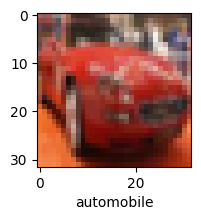

In [33]:
plot_sample(X_train, y_train, 5)    #ploting sample images

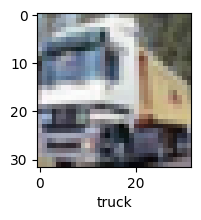

In [18]:
plot_sample(X_train, y_train, 1)

In [19]:
X_train = X_train / 255.0   #to normalize from 0 to 1, divide image by 255 coz image has 3 channel,rgb and each channel range 0 to 255
X_test = X_test / 255.0

In [20]:
# artificial neural network for image classification
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 154s 98ms/step - accuracy: 0.3025 - loss: 1.9306
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 177s 82ms/step - accuracy: 0.4209 - loss: 1.6431
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 152s 89ms/step - accuracy: 0.4503 - loss: 1.5543
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 88ms/step - accuracy: 0.4761 - loss: 1.4863
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 121s 74ms/step - accuracy: 0.4992 - loss: 1.4372


In [ ]:
#  5 epochs- accuracy is at around 49%

In [21]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.47      0.54      1000
           1       0.67      0.53      0.59      1000
           2       0.29      0.50      0.36      1000
           3       0.39      0.18      0.25      1000
           4       0.39      0.43      0.41      1000
           5       0.46      0.30      0.37      1000
           6       0.45      0.68      0.54      1000
           7       0.54      0.56      0.55      1000
           8       0.68      0.57      0.62      1000
           9       0.55      0.61      0.58      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.48     10000
weighted avg       0.50      0.48      0.48     10000



In [22]:
# convolutional neural network
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.5196 - loss: 1.3520
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 38ms/step - accuracy: 0.6217 - loss: 1.0826
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 39ms/step - accuracy: 0.6680 - loss: 0.9523
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 39ms/step - accuracy: 0.7021 - loss: 0.8688
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.7195 - loss: 0.8062


In [ ]:
# 5 epochs- accuracy was at around 70%
# computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [26]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6914 - loss: 0.9056


[0.9096484184265137, 0.6888999938964844]

In [27]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


array([[1.94265023e-02, 1.04523143e-02, 2.22971793e-02, 4.83751863e-01,
        1.89158483e-03, 3.41902822e-01, 4.00910415e-02, 5.84237452e-04,
        4.68043126e-02, 3.27981897e-02],
       [3.85466367e-02, 1.57178864e-02, 1.67289239e-04, 8.60555247e-06,
        4.86695262e-06, 3.80761520e-07, 5.05662058e-07, 6.39907228e-07,
        9.45201397e-01, 3.51728697e-04],
       [1.32486805e-01, 3.35940689e-01, 7.57102715e-03, 2.63165403e-02,
        1.20135979e-03, 4.10238793e-03, 5.94190729e-04, 1.92494749e-03,
        3.29570323e-01, 1.60291821e-01],
       [8.79634738e-01, 2.38360669e-02, 4.46149744e-02, 5.37825807e-04,
        5.67747746e-03, 1.54597474e-05, 6.65314542e-03, 2.19409150e-04,
        3.86294313e-02, 1.81413590e-04],
       [6.24377863e-05, 3.49425864e-05, 1.44140385e-02, 6.71737343e-02,
        6.55796826e-01, 4.46452312e-02, 2.17539668e-01, 2.52316589e-04,
        3.69660811e-05, 4.38175375e-05]], dtype=float32)

In [28]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 4]

In [29]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 49ms/step - accuracy: 0.7446 - loss: 0.7407 - val_accuracy: 0.6839 - val_loss: 0.9276
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 41ms/step - accuracy: 0.7578 - loss: 0.6942 - val_accuracy: 0.6926 - val_loss: 0.9188
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 44ms/step - accuracy: 0.7760 - loss: 0.6431 - val_accuracy: 0.6911 - val_loss: 0.9194
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 41ms/step - accuracy: 0.7809 - loss: 0.6156 - val_accuracy: 0.6968 - val_loss: 0.9190
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 0.8000 - loss: 0.5689 - val_accuracy: 0.6988 - val_loss: 0.9433


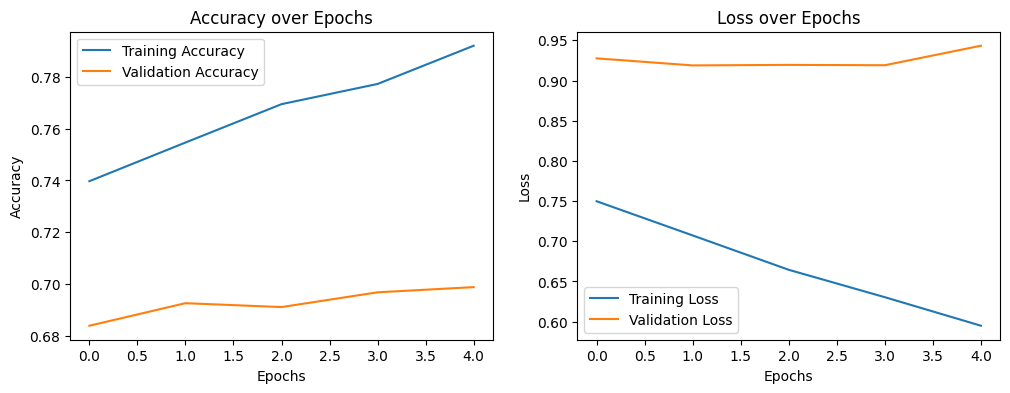

In [38]:
history = cnn.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

def plot_metrics(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_metrics(history)


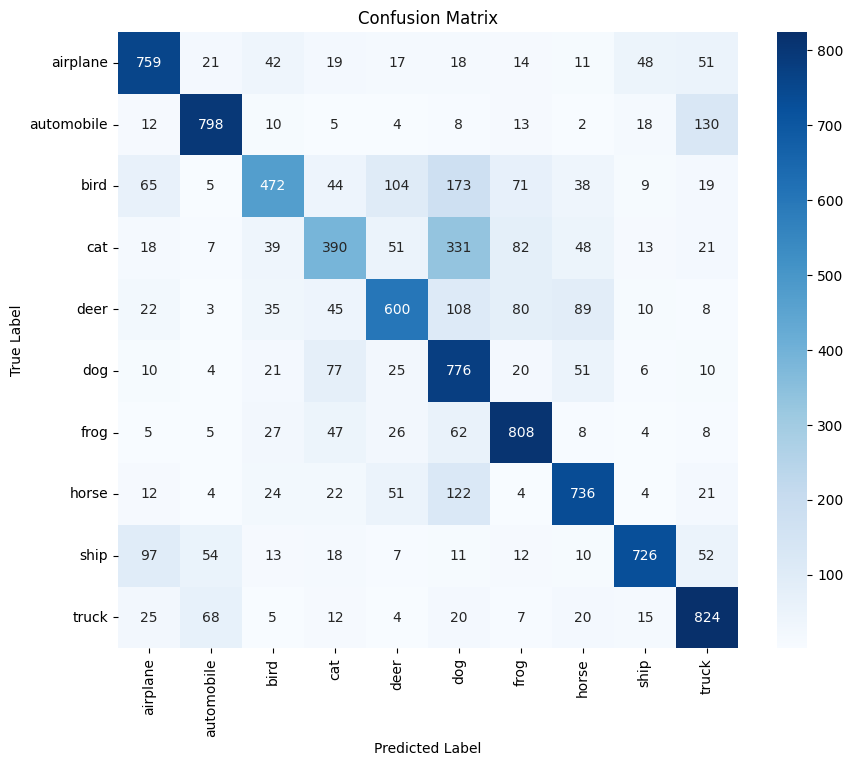

In [39]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


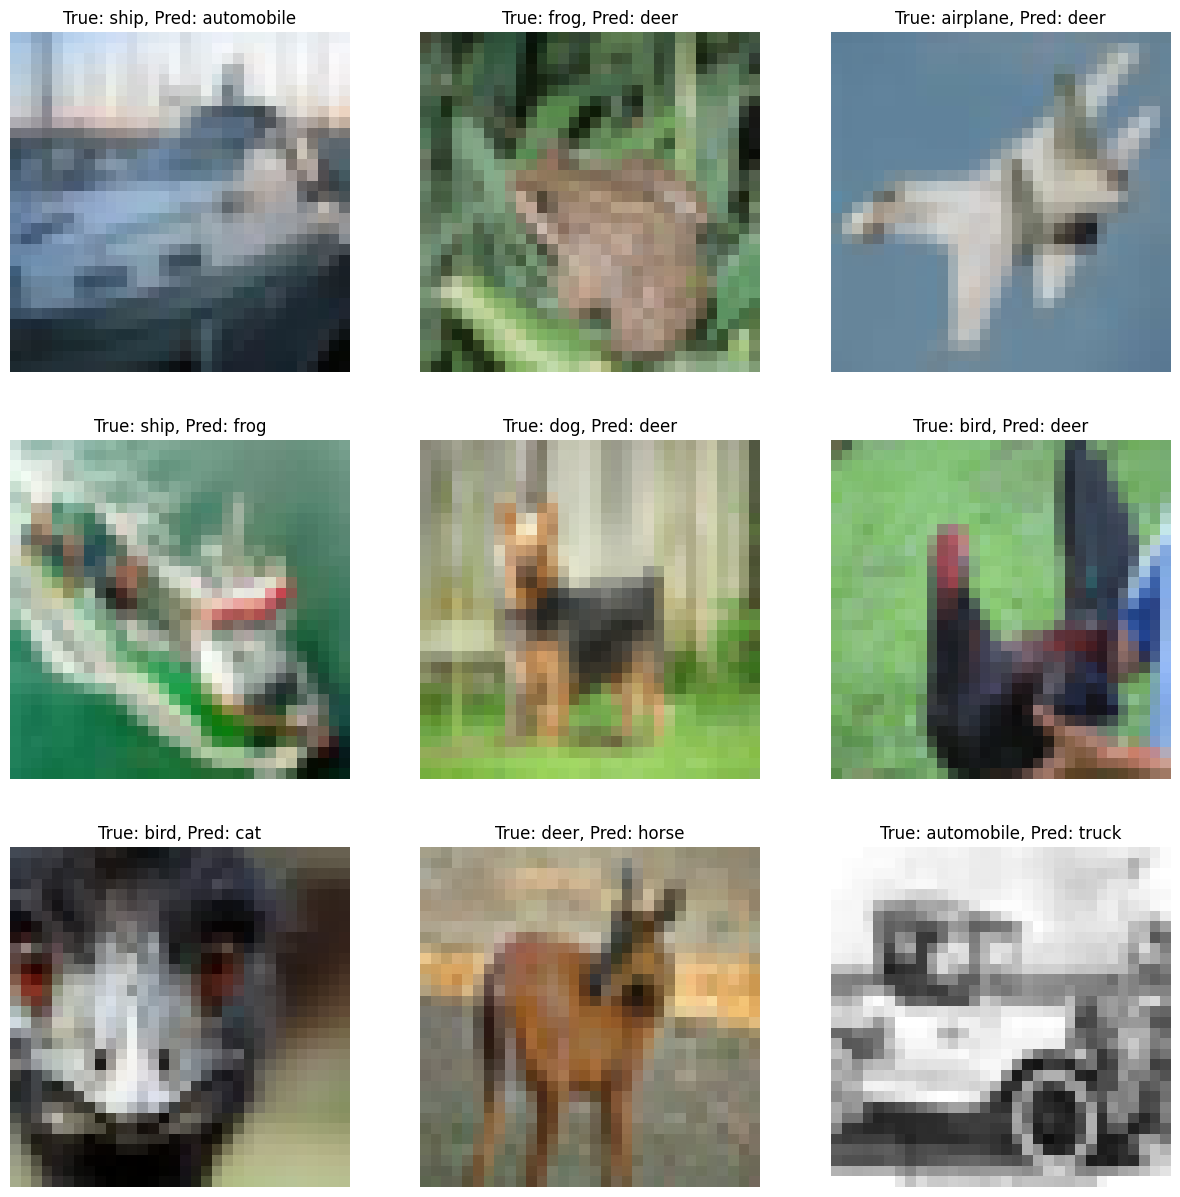

In [40]:
def plot_misclassified(X, y_true, y_pred, classes):
    misclassified_idx = np.where(y_true != y_pred)[0]

    plt.figure(figsize=(15, 15))
    for i, idx in enumerate(misclassified_idx[:9]):
        plt.subplot(3, 3, i+1)
        plt.imshow(X[idx])
        plt.title(f"True: {classes[y_true[idx]]}, Pred: {classes[y_pred[idx]]}")
        plt.axis('off')
    plt.show()

plot_misclassified(X_test, y_test, y_classes, classes)


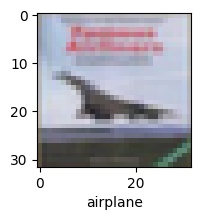

In [30]:
plot_sample(X_test, y_test,3)

In [31]:
classes[y_classes[3]]

'airplane'

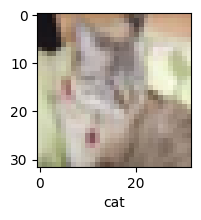

In [34]:
plot_sample(X_test, y_test,8)

In [36]:
classes[y_classes[8]]

'cat'